In [21]:
import numpy as np
import pandas as pd
import pickle
from scipy.sparse import csr_matrix

from models.group_recommender_mf import GroupRecommenderMF
from models.explicit_mf_with_bias import SGDExplicitBiasMF
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
anime_df = pd.read_csv("../../data/anime.csv")

In [3]:
group_mf = GroupRecommenderMF(
    full_model_file_path = "../../data/model_sgd_mf_v4_50__1666837325.pkl",
    item_encoder_file_path="../../data/anime_encoder.csv")

In [4]:
group_mf.item_vecs.shape

(5569, 128)

In [5]:
group_mf.item_encoder_df

,original_id,encoded_id
0,1,0
1,6,1
2,7,2
3,8,3
4,15,4
...,...,...
5564,45615,5564
5565,45616,5565
5566,46000,5566
5567,47398,5567


In [6]:
group_rating_df = pd.read_csv("../../data/group_rating_real.csv")
group_rating_df.columns = ["user_name", "item_id", "rating"]
group_rating_df

,user_name,item_id,rating
0,Kien,20,9
1,Kien,1735,8
2,Kien,918,10
3,Kien,21,6
4,Kien,30276,10
5,Kien,25777,10
6,Kien,40028,9
7,Ajay Friend,30276,10
8,Ajay Friend,20,9
9,Ajay Friend,1735,8


In [8]:
# Try different regularization parameters
for reg in [1e-2, 1e-1, 1, 1e1, 1e2]:
    rec_type = "virtual_user"
    agg_method = "mean"
    recommendations = group_mf.recommend_group(group_rating_df, reg=reg, 
        rec_type=rec_type, agg_method=agg_method)
    print("reg = {}, rec_type = {}, agg_method = {}".format(reg, rec_type, agg_method))
    print(recommendations)


reg = 0.01, rec_type = virtual_user, agg_method = mean
   recommendation_score       Kien  Ajay Friend  Lily‘s friend    Tanmay  \
0             20.460308  19.602449     7.354350       7.425789  7.006823   
1             19.812627  15.675646     7.997404       7.553798  7.833024   
2             18.890997  16.336947     8.290082       8.129752  7.947976   
3             18.569657  17.894413     7.466569       7.823185  7.135932   
4             18.528714  14.671626     7.664979       7.671208  7.177290   
5             18.012909  17.515401     8.616562       8.365803  7.971952   
6             17.627740  11.115469     8.077318       7.571617  7.433633   
7             17.419138  16.792185     8.778013       7.467039  8.365394   
8             17.353638  15.918980     8.629981       7.498418  8.536153   
9             17.326561  18.099235     8.788678       8.319542  8.270039   

   Tanmay's friend     Chase  item_id  
0         9.296360  6.515234    16774  
1         6.561991  8.616257

In [168]:
# Try different recommendation types (rec_type)
for rec_type in ["virtual_user", "combine_recommender"]:
    reg = 1
    agg_method = "mean"
    recommendations = group_mf.recommend_group(group_rating_df, reg=reg, 
        rec_type=rec_type, agg_method=agg_method)
    print("reg = {}, rec_type = {}, agg_method = {}".format(reg, rec_type, agg_method))
    print(recommendations)


reg = 1, rec_type = virtual_user, agg_method = mean
   recommendation_score      Kien  Ajay Friend  Lily‘s friend    Tanmay  \
0             10.854972  7.982945     8.233891       7.620590  8.211658   
1             10.745583  8.054483     8.611311       8.517568  8.127477   
2             10.531300  8.472874     8.476894       7.372219  8.182655   
3             10.276055  6.311831     6.383707       6.063359  6.653133   
4             10.201239  8.673754     8.611553       7.518127  8.520127   
5             10.021067  7.226166     7.672293       7.666286  7.190326   
6              9.965378  7.608402     7.754538       7.081450  7.997534   
7              9.919194  8.369005     8.530808       8.205743  8.147707   
8              9.819855  6.948370     6.870567       7.435586  7.684697   
9              9.739498  8.488874     8.699859       8.462360  8.389898   

   Tanmay's friend     Chase  item_id  
0         9.236191  8.147362     7724  
1         8.331187  8.851320       30  
2 

In [93]:
# Try different agg_method (rec_type)
for agg_method in ["min", "mean", "max"]:
    reg = 1
    rec_type = "combine_recommender"
    recommendations = group_mf.recommend_group(group_rating_df, reg=reg, 
        rec_type=rec_type, agg_method=agg_method)
    print("reg = {}, rec_type = {}, agg_method = {}".format(reg, rec_type, agg_method))
    print(recommendations)


reg = 1, rec_type = combine_recommender, agg_method = min
   recommendation_score      Kien  Ajay Friend  Lily‘s friend    Tanmay  \
0              8.531909  9.037251     8.996379       8.818661  9.031197   
1              8.389898  8.488874     8.699859       8.462360  8.389898   
2              8.368869  8.408205     8.694580       8.368869  8.691821   
3              8.209148  9.010242     9.153101       8.729383  8.600528   
4              8.204586  8.204586     8.262421       8.729112  8.325559   
5              8.199704  8.409818     8.536208       8.797864  8.561612   
6              8.170332  8.324277     8.600052       8.621617  8.328987   
7              8.133889  8.814287     8.787680       8.335666  8.277312   
8              8.099070  8.739240     9.049786       8.349207  8.585627   
9              8.085188  8.099900     8.476505       8.311946  8.086816   

   Tanmay's friend     Chase  item_id  
0         8.531909  8.979723     2904  
1         8.846288  8.555930     975

In [11]:
recommendations.merge(anime_df, left_on="item_id", right_on="MAL_ID", how="inner")[
    ["item_id", "Name", "English name", "recommendation_score"]
]

,item_id,Name,English name,recommendation_score
0,38524,Shingeki no Kyojin Season 3 Part 2,Attack on Titan Season 3 Part 2,10.058645
1,28825,Himouto! Umaru-chan,Himouto! Umaru-chan,9.965230
2,9969,Gintama',Gintama Season 2,9.926534
3,32995,Yuri!!! on Ice,Yuri!!! On ICE,9.886779
4,15417,Gintama': Enchousen,Gintama:Enchousen,9.802084
5,35760,Shingeki no Kyojin Season 3,Attack on Titan Season 3,9.745201
6,5114,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist:Brotherhood,9.733310
7,11061,Hunter x Hunter (2011),Hunter x Hunter,9.641880
8,34096,Gintama.,Gintama Season 5,9.637358
9,6500,Seikon no Qwaser,The Qwaser of Stigmata,9.574590


In [97]:
def evaluate(group_rating_df, k=50):
    unique_ids = np.array(group_rating_df.item_id.unique())
    np.random.shuffle(unique_ids)
    users=list(group_rating_df.user_name.unique())
    kept_ids, dropped_ids = train_test_split(unique_ids, test_size=0.25)
    group_rating_df_kept = group_rating_df[group_rating_df['item_id'].isin(kept_ids)]
    group_rating_df_dropped = group_rating_df[group_rating_df['item_id'].isin(dropped_ids)]
    num=[]
    p=[]
    for reg in [1e-2, 1e-1, 1, 1e1, 1e2]:
        for rec_type in ["virtual_user", "combine_recommender"]:
            for agg_method in ["min", "mean", "max"]:
                temp=0
                temp_reg=0
                temp_rec=0
                temp_agg=0
                recommendations = group_mf.recommend_group(group_rating_df_kept, reg=reg, 
                                                           rec_type=rec_type, agg_method=agg_method, k=k)
                items=recommendations['item_id'].tolist()
                #Precisoin/Recall Bit
                precisions=[]
                for user in users:
                    selection=list(group_rating_df_dropped[group_rating_df_dropped['user_name']==user].item_id.unique())
                    precision=0
                    for item in items:
                        if item in selection:
                            precision+=1
                    precision/=len(items)
                    precisions.append(precision)
                    print(f'Precision for user {user}: {precision}')
                overall_precision=sum(precisions)/len(precisions)
                p.append(overall_precision)
                if int(round(6*k*overall_precision))>temp:
                    temp_reg=reg
                    temp_rec=rec_type
                    temp_agg=agg_method
                print(f'Overall Precision for reg {reg}, rec_type {rec_type}, and agg_method {agg_method}: {overall_precision}')
                #print(recommendations)   
                
                #MSE Bit
                group_rating_df_dropped_list = group_rating_df_dropped.values.tolist()
                mse=0
                for entry in group_rating_df_dropped_list:
                    if entry[1] in items:
                        temp=recommendations[recommendations['item_id']==entry[1]][entry[0]].tolist()
                        mse+= (entry[2]-temp[0])**2
                num.append(6*k*float(overall_precision))
                
                print(f'MSE on {6*k*overall_precision} correct recs: {mse/(6*k*(overall_precision+.00001))}')
                print(f'{int(round(6*k*overall_precision))}/10 recs exist in at least one user list')
                
    recs= group_mf.recommend_group(group_rating_df_kept, reg=reg, rec_type=rec_type, agg_method=agg_method, k=k)
    items=recs['item_id'].tolist()
    #Precisoin/Recall Bit
    p=[]
    mse=0
    vals=[5,10,15,20,25,30,35,40,45,50]
    for i in vals:
        temp=recs[:i]
        items=temp['item_id'].tolist()
    
        for user in users:
            selection=list(group_rating_df_dropped[group_rating_df_dropped['user_name']==user].item_id.unique())
            precision=0
            for item in items:
                if item in selection:
                    precision+=1
            precision/=len(items)
            precisions.append(precision)
            print(f'Precision for user {user}: {precision}')
        overall_precision=sum(precisions)/len(precisions)
        p.append(int(round(overall_precision*6*i)))
        for entry in group_rating_df_dropped_list:
            if entry[1] in items:
                temp=recs[recs['item_id']==entry[1]][entry[0]].tolist()
                mse+= (entry[2]-temp[0])**2
        
                
    print(int(round(max(num))))
    #print("reg = {}, rec_type = {}, agg_method = {}".format(reg, rec_type, agg_method))
    #print(recommendations)
    plt.plot(vals,p)
    plt.xlabel('Number of Recommendations Shown')
    plt.ylabel('Number of Matched Recommendations')
    return mse/(6*k*(overall_precision+.00001))

In [58]:
###THE BELOW CELLS ARE ALL FOR TESTING EVALUATE FUNCTION
temp=[]
ks=[5,10,15,20,25,30,35,40,45,50]
for i in ks:
    y=0
    for j in range(5):
        y+=evaluate(group_rating_df, k=i)
    temp.append(y/5)

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.2
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method mean: 0.03333333333333333
MSE on 1.0 correct recs: 1.5149745866640323
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.2
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type v

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.2
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type combine_recommender, and agg_method mean: 0.03333333333333333
MSE on 1.0 correct recs: 1.4922126843135248
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.2
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type combine_recommender, and agg_method max: 0.03333333333333333
MSE on 1.0 correct recs: 1.4922126843135248
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.2
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type virtual_user, and agg_method max: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type combine_recommender, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type combine_recommender, and agg_method

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type virtual_user, and agg_method max: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type combine_recommender, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.2
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type combine_recommender, and agg_

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method mean: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method max

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.2
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method min: 0.03333333333333333
MSE on 1.0 correct recs: 1.533968071082336
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.2
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method mean: 0.03333333333333333
MSE on 1.0 correct recs: 1.533968071082336
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.2
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Pre

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type combine_recommender, and agg_method max: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type virtual_user, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type virtual_user, and agg_method 

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type combine_recommender, and agg_method max: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type virtual_user, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type virtual_user, and agg_method mean

Precision for user Kien: 0.1
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type combine_recommender, and agg_method max: 0.016666666666666666
MSE on 1.0 correct recs: 0.07807821103839915
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type virtual_user, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type combine_recommender, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.1
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type combine_recommender, and agg_method mean: 0.016666666666666666
MSE on 1.0 correct recs: 0.5853810560600389
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.1
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.1
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.1
Precision for user Chase: 0.1
Overall Precision for reg 10.0, rec_type virtual_user, and agg_method max: 0.05000000000000001
MSE on 3.0000000000000004 correct recs: 2.2273080159972514
3/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.1
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type combine_recommender, and agg_method min: 0.016666666666666666
MSE on 1.0 correct recs: 6.149081907580645
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.1
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user C

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.1
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type virtual_user, and agg_method min: 0.016666666666666666
MSE on 1.0 correct recs: 1.2206134533068356
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.1
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type virtual_user, and agg_method mean: 0.016666666666666666
MSE on 1.0 correct recs: 1.2206134533068356
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.1
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precisi

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type combine_recommender, and agg_method max: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type virtual_user, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type virtual_user, and agg_method

Precision for user Kien: 0.1
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type combine_recommender, and agg_method mean: 0.016666666666666666
MSE on 1.0 correct recs: 0.6099234232788776
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.1
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type combine_recommender, and agg_method max: 0.016666666666666666
MSE on 1.0 correct recs: 0.6099234232788776
1/10 recs exist in at least one user list
done


1
Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Ch

Precision for user Ajay Friend: 0.13333333333333333
Precision for user Lily‘s friend: 0.06666666666666667
Precision for user Tanmay: 0.06666666666666667
Precision for user Tanmay's friend: 0.13333333333333333
Precision for user Chase: 0.13333333333333333
Overall Precision for reg 10.0, rec_type virtual_user, and agg_method min: 0.09999999999999999
MSE on 9.0 correct recs: 2.780735439874366
9/10 recs exist in at least one user list
done


Precision for user Kien: 0.06666666666666667
Precision for user Ajay Friend: 0.13333333333333333
Precision for user Lily‘s friend: 0.06666666666666667
Precision for user Tanmay: 0.06666666666666667
Precision for user Tanmay's friend: 0.13333333333333333
Precision for user Chase: 0.13333333333333333
Overall Precision for reg 10.0, rec_type virtual_user, and agg_method mean: 0.09999999999999999
MSE on 9.0 correct recs: 2.780735439874366
9/10 recs exist in at least one user list
done


Precision for user Kien: 0.06666666666666667
Precision for user Ajay F

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type combine_recommender, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type combine_recommender, and agg_method mean: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type combine_recommender, 

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type combine_recommender, and agg_method max: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


5
Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_m

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type combine_recommender, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.06666666666666667
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type combine_recommender, and agg_method mean: 0.011111111111111112
MSE on 1.0 correct recs: 1.522980668955633
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.06666666666666667
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 

Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type virtual_user, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type virtual_user, and agg_method mean: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.06666666666666667
Precision for user Chase: 0.06666666666666667
Overall Precision for reg 1, rec_type virtual_user, and agg_method max: 0.02

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type combine_recommender, and agg_method max: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.06666666666666667
Precision for user Lily‘s friend: 0.06666666666666667
Precision for user Tanmay: 0.06666666666666667
Precision for user Tanmay's friend: 0.06666666666666667
Precision for user Chase: 0.06666666666666667
Overall Precision for reg 0.1, rec_type virtual_user, and agg_method min: 0.05555555555555555
MSE on 5.0 correct recs: 0.8755539134109211
5/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.06666666666666667
Precision for user Lily‘s friend: 0.06666666666666667
Precision for user Tanmay:

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.06666666666666667
Precision for user Lily‘s friend: 0.06666666666666667
Precision for user Tanmay: 0.06666666666666667
Precision for user Tanmay's friend: 0.06666666666666667
Precision for user Chase: 0.06666666666666667
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method mean: 0.05555555555555555
MSE on 5.0 correct recs: 0.896243747973032
5/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.06666666666666667
Precision for user Lily‘s friend: 0.06666666666666667
Precision for user Tanmay: 0.06666666666666667
Precision for user Tanmay's friend: 0.06666666666666667
Precision for user Chase: 0.06666666666666667
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method max: 0.05555555555555555
MSE on 5.0 correct recs: 0.896243747973032
5/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Fr

Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type combine_recommender, and agg_method mean: 0.008333333333333333
MSE on 1.0 correct recs: 5.197241101057962
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.05
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type combine_recommender, and agg_method max: 0.008333333333333333
MSE on 1.0 correct recs: 5.197241101057962
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.05
Precision for user Ajay Friend: 0.05
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type virtual_user, and agg_me

Precision for user Kien: 0.05
Precision for user Ajay Friend: 0.05
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.05
Precision for user Chase: 0.05
Overall Precision for reg 0.1, rec_type virtual_user, and agg_method max: 0.03333333333333333
MSE on 4.0 correct recs: 1.1038044160517493
4/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type combine_recommender, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec

Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method mean: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method max: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type combine_recommender, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at l

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method mean: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method 

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type combine_recommender, and agg_method max: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type virtual_user, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type virtual_user, and agg_method 

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.05
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type combine_recommender, and agg_method min: 0.008333333333333333
MSE on 1.0 correct recs: 2.5115357261240576
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.05
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.05
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type combine_recommender, and agg_method mean: 0.016666666666666666
MSE on 2.0 correct recs: 0.6124088425526818
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.05
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.05
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Cha

Precision for user Kien: 0.08
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method mean: 0.013333333333333334
MSE on 2.0 correct recs: 7.401303458673991
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.04
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method max: 0.006666666666666667
MSE on 1.0 correct recs: 9.97537402571167
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Pr

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.04
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method mean: 0.006666666666666667
MSE on 1.0 correct recs: 0.6267512085805464
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.08
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_

Precision for user Kien: 0.04
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type combine_recommender, and agg_method max: 0.006666666666666667
MSE on 1.0 correct recs: 2.198347977259079
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type virtual_user, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_ty

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.04
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type combine_recommender, and agg_method min: 0.006666666666666667
MSE on 1.0 correct recs: 1.8248999130829575
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.04
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type combine_recommender, and agg_method mean: 0.006666666666666667
MSE on 1.0 correct recs: 1.8248999130829575
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.04
Precision for user Ajay Friend: 0.04
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chas

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method mean: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method max: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type combine_recommender, and agg_met

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.04
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method min: 0.006666666666666667
MSE on 1.0 correct recs: 8.45652305254943
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.04
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method mean: 0.006666666666666667
MSE on 1.0 correct recs: 8.45652305254943
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.04
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.04
Precision for user Chase: 0.0
Overall

Precision for user Kien: 0.08
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.04
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.04
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type combine_recommender, and agg_method mean: 0.02666666666666667
MSE on 4.0 correct recs: 1.045017134645024
4/10 recs exist in at least one user list
done


Precision for user Kien: 0.04
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.04
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type combine_recommender, and agg_method max: 0.013333333333333334
MSE on 2.0 correct recs: 0.773144130570959
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0

Precision for user Ajay Friend: 0.03333333333333333
Precision for user Lily‘s friend: 0.03333333333333333
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type virtual_user, and agg_method mean: 0.016666666666666666
MSE on 3.0 correct recs: 1.4606274731605848
3/10 recs exist in at least one user list
done


Precision for user Kien: 0.03333333333333333
Precision for user Ajay Friend: 0.03333333333333333
Precision for user Lily‘s friend: 0.06666666666666667
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type virtual_user, and agg_method max: 0.022222222222222223
MSE on 4.0 correct recs: 3.20111481860924
4/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's frie

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type combine_recommender, and agg_method max: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


4
Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.03333333333333333
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.03333333333333333
Overall Precision for reg 0.01, 

done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type combine_recommender, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.03333333333333333
Precision for user Tanmay's friend: 0.03333333333333333
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type combine_recommender, and agg_method mean: 0.011111111111111112
MSE on 2.0 correct recs: 1.8685470937853292
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.03333333333333333
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Pr

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.03333333333333333
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type virtual_user, and agg_method min: 0.005555555555555556
MSE on 1.0 correct recs: 1.508088135639995
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.03333333333333333
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.03333333333333333
Precision for user Chase: 0.03333333333333333
Overall Precision for reg 1, rec_type virtual_user, and agg_method mean: 0.016666666666666666
MSE on 3.0 correct recs: 2.009780991119207
3/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.03333333333333333
Precision for user Tanmay: 0.0
Precisi

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method max: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type combine_recommender, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type combine_recommender, and a


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method mean: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.03333333333333333
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.03333333333333333
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method max: 0.011111111111111112
MSE on 2.0 correct recs: 0.026918988404537544
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Over

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type combine_recommender, and agg_method mean: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.03333333333333333
Precision for user Lily‘s friend: 0.03333333333333333
Precision for user Tanmay: 0.03333333333333333
Precision for user Tanmay's friend: 0.03333333333333333
Precision for user Chase: 0.03333333333333333
Overall Precision for reg 1, rec_type combine_recommender, and agg_method max: 0.027777777777777776
MSE on 5.0 correct recs: 1.0710380261224248
5/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.03333333333333333
Precision for user Lily‘s friend: 0.03333333333333333
Precision for user Tan

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type virtual_user, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type virtual_user, and agg_method mean: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.02857142857142857
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type virtual_user, and a

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.02857142857142857
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type combine_recommender, and agg_method min: 0.0047619047619047615
MSE on 0.9999999999999999 correct recs: 8.799792368527282
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.02857142857142857
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type combine_recommender, and agg_method mean: 0.0047619047619047615
MSE on 0.9999999999999999 correct recs: 8.799792368527282
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
P

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type combine_recommender, and agg_method mean: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.05714285714285714
Precision for user Lily‘s friend: 0.02857142857142857
Precision for user Tanmay: 0.02857142857142857
Precision for user Tanmay's friend: 0.02857142857142857
Precision for user Chase: 0.05714285714285714
Overall Precision for reg 1, rec_type combine_recommender, and agg_method max: 0.03333333333333333
MSE on 7.0 correct recs: 0.7903382289794353
7/10 recs exist in at least one user list
done


Precision for user Kien: 0.02857142857142857
Precision for user Ajay Friend: 0.05714285714285714
Precision for user Lily‘s friend: 0.02857142857142857
Precisi

Precision for user Kien: 0.02857142857142857
Precision for user Ajay Friend: 0.02857142857142857
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type virtual_user, and agg_method min: 0.009523809523809523
MSE on 1.9999999999999998 correct recs: 0.29027428138447936
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.02857142857142857
Precision for user Ajay Friend: 0.02857142857142857
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type virtual_user, and agg_method mean: 0.009523809523809523
MSE on 1.9999999999999998 correct recs: 0.29027428138447936
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for us

Precision for user Kien: 0.02857142857142857
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.02857142857142857
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method max: 0.009523809523809523
MSE on 1.9999999999999998 correct recs: 4.837119321878921
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.02857142857142857
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.02857142857142857
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type combine_recommender, and agg_method min: 0.009523809523809523
MSE on 1.9999999999999998 correct recs: 4.837119321878921
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.02857142857142857
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.02857142857142857
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type virtual_user, and agg_method min: 0.0047619047619047615
MSE on 0.9999999999999999 correct recs: 0.778528621452196
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.02857142857142857
Precision for user Lily‘s friend: 0.02857142857142857
Precision for user Tanmay: 0.02857142857142857
Precision for user Tanmay's friend: 0.02857142857142857
Precision for user Chase: 0.02857142857142857
Overall Precision for reg 10.0, rec_type virtual_user, and agg_method mean: 0.023809523809523808
MSE on 5.0 correct recs: 0.9536641013695324
5/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.02857142857142857
Precision for user Li

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.02857142857142857
Precision for user Lily‘s friend: 0.02857142857142857
Precision for user Tanmay: 0.02857142857142857
Precision for user Tanmay's friend: 0.05714285714285714
Precision for user Chase: 0.05714285714285714
Overall Precision for reg 0.1, rec_type virtual_user, and agg_method max: 0.03333333333333333
MSE on 7.0 correct recs: 3.705720236842057
7/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.02857142857142857
Precision for user Lily‘s friend: 0.02857142857142857
Precision for user Tanmay: 0.02857142857142857
Precision for user Tanmay's friend: 0.05714285714285714
Precision for user Chase: 0.05714285714285714
Overall Precision for reg 0.1, rec_type combine_recommender, and agg_method min: 0.03333333333333333
MSE on 7.0 correct recs: 3.705720236842057
7/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay 

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type combine_recommender, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type combine_recommender, and agg_method mean: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.02857142857142857
Precision for user Lily‘s friend: 0.02857142857142857
Precision for user Tanmay: 0.02857142857142857
Precision for user Tanmay's friend: 0.02857142857142857
Precision for user Chas

Precision for user Tanmay: 0.025
Precision for user Tanmay's friend: 0.025
Precision for user Chase: 0.025
Overall Precision for reg 10.0, rec_type virtual_user, and agg_method min: 0.020833333333333332
MSE on 5.0 correct recs: 0.7308841945120088
5/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.025
Precision for user Lily‘s friend: 0.025
Precision for user Tanmay: 0.025
Precision for user Tanmay's friend: 0.025
Precision for user Chase: 0.025
Overall Precision for reg 10.0, rec_type virtual_user, and agg_method mean: 0.020833333333333332
MSE on 5.0 correct recs: 0.7308841945120088
5/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.025
Precision for user Lily‘s friend: 0.025
Precision for user Tanmay: 0.025
Precision for user Tanmay's friend: 0.025
Precision for user Chase: 0.025
Overall Precision for reg 10.0, rec_type virtual_user, and agg_method max: 0.020833333

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.025
Precision for user Tanmay's friend: 0.025
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type combine_recommender, and agg_method mean: 0.008333333333333333
MSE on 2.0 correct recs: 2.0269314475554716
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.025
Precision for user Ajay Friend: 0.025
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.025
Precision for user Chase: 0.025
Overall Precision for reg 0.1, rec_type combine_recommender, and agg_method max: 0.016666666666666666
MSE on 4.0 correct recs: 4.0285556098400335
4/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for u

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method max: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type combine_recommender, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.025
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.025
Precision for user Tanmay: 0.025
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type combine_recommender,

Precision for user Kien: 0.025
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.025
Precision for user Tanmay: 0.025
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method min: 0.012500000000000002
MSE on 3.0000000000000004 correct recs: 1.7690207239552396
3/10 recs exist in at least one user list
done


Precision for user Kien: 0.025
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.025
Precision for user Tanmay: 0.025
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method mean: 0.012500000000000002
MSE on 3.0000000000000004 correct recs: 1.7690207239552396
3/10 recs exist in at least one user list
done


Precision for user Kien: 0.025
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.05
Precision for user Tanmay: 0.025
Precision for user Tanmay's fr

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type combine_recommender, and agg_method max: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type virtual_user, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type virtual_user, and agg_method 

Precision for user Kien: 0.025
Precision for user Ajay Friend: 0.025
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.05
Precision for user Chase: 0.025
Overall Precision for reg 0.1, rec_type combine_recommender, and agg_method min: 0.020833333333333332
MSE on 5.0 correct recs: 5.122775055580276
5/10 recs exist in at least one user list
done


Precision for user Kien: 0.025
Precision for user Ajay Friend: 0.025
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.05
Precision for user Chase: 0.025
Overall Precision for reg 0.1, rec_type combine_recommender, and agg_method mean: 0.020833333333333332
MSE on 5.0 correct recs: 5.122775055580276
5/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.025
Precision for

Precision for user Kien: 0.022222222222222223
Precision for user Ajay Friend: 0.022222222222222223
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.022222222222222223
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method min: 0.011111111111111112
MSE on 3.0 correct recs: 10.476136440467323
3/10 recs exist in at least one user list
done


Precision for user Kien: 0.022222222222222223
Precision for user Ajay Friend: 0.022222222222222223
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.022222222222222223
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method mean: 0.011111111111111112
MSE on 3.0 correct recs: 10.476136440467323
3/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precisio

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.022222222222222223
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type combine_recommender, and agg_method min: 0.003703703703703704
MSE on 1.0 correct recs: 2.7393279231438505
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.022222222222222223
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.022222222222222223
Precision for user Tanmay's friend: 0.022222222222222223
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type combine_recommender, and agg_method mean: 0.011111111111111112
MSE on 3.0 correct recs: 2.052650609040991
3/10 recs exist in at least one user list
done


Precision for user Kien: 0.022222222222222223
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision fo

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type combine_recommender, and agg_method max: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.022222222222222223
Precision for user Ajay Friend: 0.022222222222222223
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type virtual_user, and agg_method min: 0.007407407407407408
MSE on 2.0 correct recs: 0.8001580649974364
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.022222222222222223
Precision for user Ajay Friend: 0.022222222222222223
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
P

Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method mean: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method max: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.022222222222222223
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type combine_recommender, and agg_method min: 0.003703703703703704
MSE on 1.0 correct recs: 0.5072362152067977
1/10 recs exist in at least one user list
d

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.022222222222222223
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type combine_recommender, and agg_method max: 0.003703703703703704
MSE on 1.0 correct recs: 2.8939653943867834
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.022222222222222223
Precision for user Tanmay's friend: 0.022222222222222223
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method min: 0.007407407407407408
MSE on 2.0 correct recs: 1.6961727923866636
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.022222222222222223
Prec

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.022222222222222223
Precision for user Lily‘s friend: 0.044444444444444446
Precision for user Tanmay: 0.022222222222222223
Precision for user Tanmay's friend: 0.044444444444444446
Precision for user Chase: 0.022222222222222223
Overall Precision for reg 0.1, rec_type combine_recommender, and agg_method max: 0.025925925925925925
MSE on 7.0 correct recs: 1.3483168004043142
7/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.022222222222222223
Precision for user Lily‘s friend: 0.044444444444444446
Precision for user Tanmay: 0.022222222222222223
Precision for user Tanmay's friend: 0.022222222222222223
Precision for user Chase: 0.022222222222222223
Overall Precision for reg 1, rec_type virtual_user, and agg_method min: 0.022222222222222223
MSE on 6.0 correct recs: 0.9793033233276107
6/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision fo

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.022222222222222223
Precision for user Lily‘s friend: 0.044444444444444446
Precision for user Tanmay: 0.044444444444444446
Precision for user Tanmay's friend: 0.044444444444444446
Precision for user Chase: 0.022222222222222223
Overall Precision for reg 100.0, rec_type combine_recommender, and agg_method max: 0.02962962962962963
MSE on 8.0 correct recs: 2.18167292057539
8/10 recs exist in at least one user list
done


8
Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user T

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type combine_recommender, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.022222222222222223
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.022222222222222223
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type combine_recommender, and agg_method mean: 0.007407407407407408
MSE on 2.0 correct recs: 2.639487031045426
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.022222222222222223
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.022222222222222223
Precision for user Tanmay's fr

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type virtual_user, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.02
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type virtual_user, and agg_method mean: 0.0033333333333333335
MSE on 1.0 correct recs: 33.599981916365714
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type virtual

Precision for user Kien: 0.02
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.02
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type combine_recommender, and agg_method mean: 0.006666666666666667
MSE on 2.0 correct recs: 2.3459300875002276
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.02
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.02
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type combine_recommender, and agg_method max: 0.006666666666666667
MSE on 2.0 correct recs: 2.3459300875002276
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Ch

Precision for user Kien: 0.02
Precision for user Ajay Friend: 0.02
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.02
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.02
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method max: 0.013333333333333334
MSE on 4.0 correct recs: 1.4096790741178113
4/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.02
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type combine_recommender, and agg_method min: 0.0033333333333333335
MSE on 1.0 correct recs: 3.2285948767181027
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.02
Precision for user Tanmay's friend: 0.0
Precision for user Chase

Precision for user Kien: 0.02
Precision for user Ajay Friend: 0.02
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.02
Overall Precision for reg 10.0, rec_type virtual_user, and agg_method min: 0.01
MSE on 3.0 correct recs: 5.225474246768731
3/10 recs exist in at least one user list
done


Precision for user Kien: 0.02
Precision for user Ajay Friend: 0.02
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.02
Precision for user Chase: 0.02
Overall Precision for reg 10.0, rec_type virtual_user, and agg_method mean: 0.013333333333333334
MSE on 4.0 correct recs: 12.702706213461074
4/10 recs exist in at least one user list
done


Precision for user Kien: 0.02
Precision for user Ajay Friend: 0.04
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.04
Overall Precisio

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.02
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type combine_recommender, and agg_method mean: 0.0033333333333333335
MSE on 1.0 correct recs: 2.5070284835447714
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.02
Precision for user Ajay Friend: 0.02
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.02
Overall Precision for reg 0.1, rec_type combine_recommender, and agg_method max: 0.01
MSE on 3.0 correct recs: 4.800455672408924
3/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.02
Precision for user Tanmay's friend: 0.02
Precision for user Chase: 0.0
Overall

Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method mean: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method max: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type combine_recommender, and agg_method min: 0.0
MSE on 0.0 corre

Precision for user Kien: 0.02
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.02
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method min: 0.006666666666666667
MSE on 2.0 correct recs: 0.3746973250099254
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.02
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method mean: 0.0033333333333333335
MSE on 1.0 correct recs: 0.5859373972273526
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.02
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Ov

[0.04666666666666667,
 0.026666666666666665,
 0.05333333333333333,
 0.025,
 0.018666666666666668,
 0.02777777777777778,
 0.026666666666666665,
 0.019166666666666665,
 0.0162962962962963,
 0.015333333333333334]

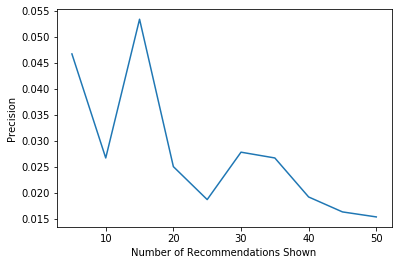

In [96]:
plt.plot(ks,temp)
plt.xlabel('Number of Recommendations Shown')
plt.ylabel('Precision')
temp

In [46]:
x=[]
for i in ks:
    y=0
    for j in range(5):
        y+=evaluate(group_rating_df, k=i)
    x.append(y/5)


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method mean: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method max

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.2
Precision for user Lily‘s friend: 0.2
Precision for user Tanmay: 0.2
Precision for user Tanmay's friend: 0.2
Precision for user Chase: 0.2
Overall Precision for reg 10.0, rec_type combine_recommender, and agg_method max: 0.16666666666666666
MSE on 5.0 correct recs: 0.841451846775988
5/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.2
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method min: 0.03333333333333333
MSE on 1.0 correct recs: 8.639624790008597
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.2
Precision for user Lily‘s friend: 0.2
Precision for user Tanmay: 0.2
Precision for user Tanmay's friend: 0.4
Precision for user Chase: 0.2
Overal

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type combine_recommender, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.2
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type combine_recommender, and agg_method mean: 0.03333333333333333
MSE on 1.0 correct recs: 3.244409230136519
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_ty

Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type virtual_user, and agg_method mean: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type virtual_user, and agg_method max: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type combine_recommender, and agg_method min: 0.0
MSE on 0.0 correct 

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method mean: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method max: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type combine_recommender, and agg_met

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.2
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method mean: 0.03333333333333333
MSE on 1.0 correct recs: 8.652163072407836
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.2
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method max: 0.03333333333333333
MSE on 1.0 correct recs: 8.652163072407836
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.2
Precision for user Chase: 0.0
Overall Pre


Precision for user Kien: 0.2
Precision for user Ajay Friend: 0.2
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type virtual_user, and agg_method min: 0.06666666666666667
MSE on 2.0 correct recs: 0.5444457725269358
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type virtual_user, and agg_method mean: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type 

MSE on 2.0 correct recs: 4.461605573515851
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.16666666666666666
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type combine_recommender, and agg_method max: 0.027777777777777776
MSE on 1.0 correct recs: 1.210958941697817
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.16666666666666666
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type virtual_user, and agg_method min: 0.027777777777777776
MSE on 1.0 correct recs: 1.220906295112579
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method mean: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method max: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.16666666666666666
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.16666666666666666
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type 

Precision for user Kien: 0.16666666666666666
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.16666666666666666
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type combine_recommender, and agg_method mean: 0.05555555555555555
MSE on 2.0 correct recs: 1.0270969410508626
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.16666666666666666
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.16666666666666666
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type combine_recommender, and agg_method max: 0.05555555555555555
MSE on 2.0 correct recs: 1.0270969410508626
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.16666666666666666
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.16666666666666666
Pr

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type virtual_user, and agg_method max: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type combine_recommender, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type combine_recommender, and agg_method

MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.16666666666666666
Precision for user Ajay Friend: 0.16666666666666666
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type virtual_user, and agg_method mean: 0.05555555555555555
MSE on 2.0 correct recs: 1.8756593529029817
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.16666666666666666
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type virtual_user, and agg_method max: 0.027777777777777776
MSE on 1.0 correct recs: 1.6872023080840417
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s

Precision for user Kien: 0.16666666666666666
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.16666666666666666
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type combine_recommender, and agg_method max: 0.05555555555555555
MSE on 2.0 correct recs: 1.1037124355254166
2/10 recs exist in at least one user list
done


2
Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
O

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.16666666666666666
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type combine_recommender, and agg_method mean: 0.027777777777777776
MSE on 1.0 correct recs: 1.8910929774326628
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.16666666666666666
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.16666666666666666
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type combine_recommender, and agg_method max: 0.05555555555555555
MSE on 2.0 correct recs: 1.3048899728934695
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.14285714285714285
Precision for user Chase: 0.14285714285714285
Overall Precision for reg 1, rec_type virtual_user, and agg_method max: 0.047619047619047616
MSE on 2.0 correct recs: 1.9868133051372647
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type combine_recommender, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall P

Precision for user Kien: 0.14285714285714285
Precision for user Ajay Friend: 0.14285714285714285
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type virtual_user, and agg_method min: 0.047619047619047616
MSE on 2.0 correct recs: 1.874919559724481
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.14285714285714285
Precision for user Ajay Friend: 0.14285714285714285
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type virtual_user, and agg_method mean: 0.047619047619047616
MSE on 2.0 correct recs: 1.874919559724481
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.14285714285714285
Precision for user Ajay Friend: 0.14285714285714285
Precision for user Lily‘s friend: 0.0
Precision for user

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.14285714285714285
Precision for user Lily‘s friend: 0.14285714285714285
Precision for user Tanmay: 0.14285714285714285
Precision for user Tanmay's friend: 0.14285714285714285
Precision for user Chase: 0.14285714285714285
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method max: 0.11904761904761903
MSE on 4.999999999999999 correct recs: 0.9318039432266025
5/10 recs exist in at least one user list
done


Precision for user Kien: 0.14285714285714285
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type combine_recommender, and agg_method min: 0.023809523809523808
MSE on 1.0 correct recs: 0.5943300846968596
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.14285714285714285
Precision for user Ajay Friend: 0.0
Precision for u

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.14285714285714285
Precision for user Lily‘s friend: 0.14285714285714285
Precision for user Tanmay: 0.14285714285714285
Precision for user Tanmay's friend: 0.2857142857142857
Precision for user Chase: 0.2857142857142857
Overall Precision for reg 1, rec_type virtual_user, and agg_method max: 0.16666666666666666
MSE on 7.0 correct recs: 1.1817480369754687
7/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.14285714285714285
Precision for user Lily‘s friend: 0.14285714285714285
Precision for user Tanmay: 0.14285714285714285
Precision for user Tanmay's friend: 0.14285714285714285
Precision for user Chase: 0.14285714285714285
Overall Precision for reg 1, rec_type combine_recommender, and agg_method min: 0.11904761904761903
MSE on 4.999999999999999 correct recs: 0.8534264229441261
5/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for 

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type combine_recommender, and agg_method max: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type virtual_user, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type virtual_user, and agg_method

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.14285714285714285
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type combine_recommender, and agg_method min: 0.023809523809523808
MSE on 1.0 correct recs: 8.185356453617084
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.14285714285714285
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type combine_recommender, and agg_method mean: 0.023809523809523808
MSE on 1.0 correct recs: 8.185356453617084
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's frien

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type virtual_user, and agg_method max: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type combine_recommender, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.14285714285714285
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type combine_re

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.125
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type combine_recommender, and agg_method max: 0.020833333333333332
MSE on 1.0 correct recs: 4.309595150674082
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type virtual_user, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type 

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type combine_recommender, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type combine_recommender, and agg_method mean: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type combine_recommende

Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method max: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type combine_recommender, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type combine_recommender, and agg_method mean: 0.0
MSE on

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.125
Precision for user Lily‘s friend: 0.125
Precision for user Tanmay: 0.125
Precision for user Tanmay's friend: 0.125
Precision for user Chase: 0.125
Overall Precision for reg 10.0, rec_type virtual_user, and agg_method mean: 0.10416666666666667
MSE on 5.0 correct recs: 0.7665519244623509
5/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.125
Precision for user Lily‘s friend: 0.125
Precision for user Tanmay: 0.125
Precision for user Tanmay's friend: 0.125
Precision for user Chase: 0.125
Overall Precision for reg 10.0, rec_type virtual_user, and agg_method max: 0.10416666666666667
MSE on 5.0 correct recs: 0.7665519244623509
5/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Ch

Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type combine_recommender, and agg_method max: 0.020833333333333332
MSE on 1.0 correct recs: 2.061986154777356
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type virtual_user, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.125
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type virtual_user, and agg_method mean: 0.020833333333333332
MSE on 1.0 correct recs: 2.039376709592686
1/10 recs exist in at least one user list
done


Precision for user Kien: 0

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type combine_recommender, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.125
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type combine_recommender, and agg_method mean: 0.020833333333333332
MSE on 1.0 correct recs: 3.6773296170201597
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.125
Precision for user Chase: 0.0
Overall Precision for r

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.125
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method mean: 0.020833333333333332
MSE on 1.0 correct recs: 8.465144567735742
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.125
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method max: 0.020833333333333332
MSE on 1.0 correct recs: 8.465144567735742
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.125
Precision for user Chase: 0.0
Ove

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type combine_recommender, and agg_method max: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.1111111111111111
Precision for user Ajay Friend: 0.1111111111111111
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type virtual_user, and agg_method min: 0.037037037037037035
MSE on 2.0 correct recs: 0.37536012137138836
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type combine_recommender, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type combine_recommender, and agg_method mean: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type combine_recommender, 

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.1111111111111111
Precision for user Chase: 0.1111111111111111
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method max: 0.037037037037037035
MSE on 2.0 correct recs: 2.4456918369428684
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type combine_recommender, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.1111111111111111
Precision for user C

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.1111111111111111
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method min: 0.018518518518518517
MSE on 1.0 correct recs: 9.154361008783175
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.1111111111111111
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method mean: 0.018518518518518517
MSE on 1.0 correct recs: 9.154361008783175
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.11111111111

Precision for user Kien: 0.1111111111111111
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.1111111111111111
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.1111111111111111
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type combine_recommender, and agg_method mean: 0.05555555555555555
MSE on 3.0 correct recs: 2.9936090595038287
3/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.1111111111111111
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type combine_recommender, and agg_method max: 0.018518518518518517
MSE on 1.0 correct recs: 1.2206866505875023
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision fo

Precision for user Ajay Friend: 0.1111111111111111
Precision for user Lily‘s friend: 0.1111111111111111
Precision for user Tanmay: 0.1111111111111111
Precision for user Tanmay's friend: 0.1111111111111111
Precision for user Chase: 0.1111111111111111
Overall Precision for reg 0.1, rec_type virtual_user, and agg_method max: 0.0925925925925926
MSE on 5.000000000000001 correct recs: 1.115134011666506
5/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type combine_recommender, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.1111111111111111
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend:

Precision for user Kien: 0.1111111111111111
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.1111111111111111
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type combine_recommender, and agg_method min: 0.037037037037037035
MSE on 2.0 correct recs: 1.0514432085317285
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.1111111111111111
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.1111111111111111
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type combine_recommender, and agg_method mean: 0.037037037037037035
MSE on 2.0 correct recs: 1.0514432085317285
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.1111111111111111
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.1111111111111111
Prec

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type virtual_user, and agg_method mean: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type virtual_user, and agg_method max: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type combine_recommender, and agg_met

Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type combine_recommender, and agg_method max: 0.016666666666666666
MSE on 1.0 correct recs: 2.0617388648127615
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.1
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type virtual_user, and agg_method min: 0.016666666666666666
MSE on 1.0 correct recs: 2.03913213113461
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.1
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type virtual_user, and agg_method mean: 0.016666666666666666
MSE on 1.0 correct

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type combine_recommender, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type combine_recommender, and agg_method mean: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type combine_recommende

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.1
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method max: 0.016666666666666666
MSE on 1.0 correct recs: 8.587714366325741
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.1
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type combine_recommender, and agg_method min: 0.016666666666666666
MSE on 1.0 correct recs: 8.587714366325741
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.1
Precision for user Chase: 0.0
Ove

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type virtual_user, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type virtual_user, and agg_method mean: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.1
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type virtual_user, and agg_method max

Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type combine_recommender, and agg_method mean: 0.05000000000000001
MSE on 3.0000000000000004 correct recs: 2.7431822589137647
3/10 recs exist in at least one user list
done


Precision for user Kien: 0.1
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.1
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.1
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type combine_recommender, and agg_method max: 0.05000000000000001
MSE on 3.0000000000000004 correct recs: 2.7431822589137647
3/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type virtual_user, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user l

Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method max: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type combine_recommender, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type combine_recommender, and agg_method mean: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Preci

Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method max: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type combine_recommender, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type combine_recommender, and agg_method mean: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exi

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.06666666666666667
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type combine_recommender, and agg_method max: 0.011111111111111112
MSE on 1.0 correct recs: 1.0578903901188708
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.06666666666666667
Precision for user Ajay Friend: 0.06666666666666667
Precision for user Lily‘s friend: 0.06666666666666667
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type virtual_user, and agg_method min: 0.03333333333333333
MSE on 3.0 correct recs: 0.6769754938345182
3/10 recs exist in at least one user list
done


Precision for user Kien: 0.06666666666666667
Precision for user Ajay Friend: 0.06666666666666667
Precision for user Lily‘s friend: 0.13333333333333

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.06666666666666667
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type combine_recommender, and agg_method min: 0.011111111111111112
MSE on 1.0 correct recs: 7.308417750852406
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.06666666666666667
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type combine_recommender, and agg_method mean: 0.011111111111111112
MSE on 1.0 correct recs: 7.308417750852406
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method mean: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.06666666666666667
Precision for user Chase: 0.06666666666666667
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method max: 0.022222222222222223
MSE on 2.0 correct recs: 2.2806161219023737
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall P

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.06666666666666667
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type combine_recommender, and agg_method max: 0.011111111111111112
MSE on 1.0 correct recs: 5.598934284722775
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.06666666666666667
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method min: 0.011111111111111112
MSE on 1.0 correct recs: 8.646976442531283
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0666

Precision for user Kien: 0.06666666666666667
Precision for user Ajay Friend: 0.06666666666666667
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type virtual_user, and agg_method mean: 0.022222222222222223
MSE on 2.0 correct recs: 0.25487372518765267
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.13333333333333333
Precision for user Ajay Friend: 0.06666666666666667
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type virtual_user, and agg_method max: 0.03333333333333333
MSE on 3.0 correct recs: 1.8345941144346039
3/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Ta


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type combine_recommender, and agg_method mean: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type combine_recommender, and agg_method max: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type virtual_user, and 

Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type combine_recommender, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type combine_recommender, and agg_method mean: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type combine_recommender, and agg_method max: 0.0

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type virtual_user, and agg_method mean: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.05
Precision for user Chase: 0.05
Overall Precision for reg 10.0, rec_type virtual_user, and agg_method max: 0.016666666666666666
MSE on 2.0 correct recs: 3.00108757281108
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.05
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type

Precision for user Lily‘s friend: 0.05
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type combine_recommender, and agg_method mean: 0.008333333333333333
MSE on 1.0 correct recs: 1.2410542228046832
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.05
Precision for user Lily‘s friend: 0.1
Precision for user Tanmay: 0.05
Precision for user Tanmay's friend: 0.05
Precision for user Chase: 0.05
Overall Precision for reg 0.1, rec_type combine_recommender, and agg_method max: 0.049999999999999996
MSE on 5.999999999999999 correct recs: 1.0601492915900315
6/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type virtu

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method mean: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method max: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.05
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type combine_recommender, and agg_me

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.05
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method min: 0.008333333333333333
MSE on 1.0 correct recs: 8.683184095286089
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.05
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method mean: 0.008333333333333333
MSE on 1.0 correct recs: 8.683184095286089
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.05
Precision for user Chase: 0.0
Overal

Precision for user Kien: 0.05
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.05
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type combine_recommender, and agg_method mean: 0.016666666666666666
MSE on 2.0 correct recs: 0.581238315432247
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.05
Precision for user Ajay Friend: 0.05
Precision for user Lily‘s friend: 0.05
Precision for user Tanmay: 0.05
Precision for user Tanmay's friend: 0.05
Precision for user Chase: 0.05
Overall Precision for reg 1, rec_type combine_recommender, and agg_method max: 0.049999999999999996
MSE on 5.999999999999999 correct recs: 0.963887018268506
6/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.05
Precision for user Lily‘s friend: 0.05
Precision for user Tanmay: 0.05
Precision for user Tanmay's friend: 0.1
Precisio

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.04
Precision for user Lily‘s friend: 0.04
Precision for user Tanmay: 0.04
Precision for user Tanmay's friend: 0.04
Precision for user Chase: 0.04
Overall Precision for reg 0.1, rec_type virtual_user, and agg_method max: 0.03333333333333333
MSE on 5.0 correct recs: 0.9114255101204293
5/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.04
Precision for user Lily‘s friend: 0.04
Precision for user Tanmay: 0.04
Precision for user Tanmay's friend: 0.04
Precision for user Chase: 0.04
Overall Precision for reg 0.1, rec_type combine_recommender, and agg_method min: 0.03333333333333333
MSE on 5.0 correct recs: 0.9114255101204293
5/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.04
Precision for user Lily‘s friend: 0.04
Precision for user Tanmay: 0.04
Precision for user Tanmay's friend: 0.08
Precision for user Chas

Precision for user Kien: 0.04
Precision for user Ajay Friend: 0.04
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.04
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method min: 0.02
MSE on 3.0 correct recs: 10.517588684411635
3/10 recs exist in at least one user list
done


Precision for user Kien: 0.04
Precision for user Ajay Friend: 0.04
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.04
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method mean: 0.02
MSE on 3.0 correct recs: 10.517588684411635
3/10 recs exist in at least one user list
done


Precision for user Kien: 0.04
Precision for user Ajay Friend: 0.04
Precision for user Lily‘s friend: 0.04
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.04
Overall Precision for reg 0.01,

Precision for user Kien: 0.04
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.04
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.04
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type combine_recommender, and agg_method mean: 0.02
MSE on 3.0 correct recs: 2.3209164191350817
3/10 recs exist in at least one user list
done


Precision for user Kien: 0.08
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.04
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.04
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type combine_recommender, and agg_method max: 0.02666666666666667
MSE on 4.0 correct recs: 2.348354191128885
4/10 recs exist in at least one user list
done


Precision for user Kien: 0.04
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.04
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.04
Precision for user Chase: 0.0
Over

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.04
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type virtual_user, and agg_method max: 0.006666666666666667
MSE on 1.0 correct recs: 0.6227351945971349
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.04
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type combine_recommender, and agg_method min: 0.006666666666666667
MSE on 1.0 correct recs: 7.213547971259813
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.08
Precision for user Chase: 0.0
Overall

done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type virtual_user, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type virtual_user, and agg_method mean: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.04
Precision for user Chase: 0.04
Overall Precision for reg 0.1, rec_type virtual_user, and agg_meth

Precision for user Kien: 0.04
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type combine_recommender, and agg_method max: 0.006666666666666667
MSE on 1.0 correct recs: 0.598584936997686
1/10 recs exist in at least one user list
done


2
Precision for user Kien: 0.04
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method min: 0.006666666666666667
MSE on 1.0 correct recs: 4.814968570079376
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.08
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type combine_recommender, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.04
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type combine_recommender, and agg_method mean: 0.006666666666666667
MSE on 1.0 correct recs: 0.6744000614002033
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.08
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg

Precision for user Kien: 0.03333333333333333
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type virtual_user, and agg_method mean: 0.005555555555555556
MSE on 1.0 correct recs: 3.680521590213472
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.03333333333333333
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.03333333333333333
Precision for user Chase: 0.03333333333333333
Overall Precision for reg 1, rec_type virtual_user, and agg_method max: 0.016666666666666666
MSE on 3.0 correct recs: 1.597545226017365
3/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanm

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.03333333333333333
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type combine_recommender, and agg_method max: 0.005555555555555556
MSE on 1.0 correct recs: 1.2081942564160313
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.03333333333333333
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type virtual_user, and agg_method min: 0.005555555555555556
MSE on 1.0 correct recs: 1.2092182939876504
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.03333333333333333
Precision for user Tanmay: 0.0
Precision for user Tanmay'

Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.06666666666666667
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method max: 0.011111111111111112
MSE on 2.0 correct recs: 0.8051774022203856
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.03333333333333333
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type combine_recommender, and agg_method min: 0.005555555555555556
MSE on 1.0 correct recs: 1.4909447901004123
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.03333333333333333
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision fo

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.03333333333333333
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type combine_recommender, and agg_method max: 0.005555555555555556
MSE on 1.0 correct recs: 3.2473253702166596
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.03333333333333333
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type virtual_user, and agg_method min: 0.005555555555555556
MSE on 1.0 correct recs: 0.6137710449177
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precisi

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type virtual_user, and agg_method mean: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.03333333333333333
Precision for user Chase: 0.03333333333333333
Overall Precision for reg 0.1, rec_type virtual_user, and agg_method max: 0.011111111111111112
MSE on 2.0 correct recs: 2.3697949970521917
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.03333333333333333
Precision for user Lily‘s friend: 0.03333333333333333
Precision for user Tanmay: 0.03333333333333333
Precision for user Tanmay's frien

Precision for user Kien: 0.03333333333333333
Precision for user Ajay Friend: 0.03333333333333333
Precision for user Lily‘s friend: 0.06666666666666667
Precision for user Tanmay: 0.03333333333333333
Precision for user Tanmay's friend: 0.06666666666666667
Precision for user Chase: 0.03333333333333333
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method mean: 0.044444444444444446
MSE on 8.0 correct recs: 1.941333477710321
8/10 recs exist in at least one user list
done


Precision for user Kien: 0.03333333333333333
Precision for user Ajay Friend: 0.03333333333333333
Precision for user Lily‘s friend: 0.06666666666666667
Precision for user Tanmay: 0.03333333333333333
Precision for user Tanmay's friend: 0.06666666666666667
Precision for user Chase: 0.03333333333333333
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method max: 0.044444444444444446
MSE on 8.0 correct recs: 1.941333477710321
8/10 recs exist in at least one user list
done


Precision for user Ki

Precision for user Kien: 0.03333333333333333
Precision for user Ajay Friend: 0.06666666666666667
Precision for user Lily‘s friend: 0.06666666666666667
Precision for user Tanmay: 0.03333333333333333
Precision for user Tanmay's friend: 0.03333333333333333
Precision for user Chase: 0.03333333333333333
Overall Precision for reg 1, rec_type virtual_user, and agg_method max: 0.044444444444444446
MSE on 8.0 correct recs: 0.9382614670224442
8/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.03333333333333333
Precision for user Lily‘s friend: 0.03333333333333333
Precision for user Tanmay: 0.03333333333333333
Precision for user Tanmay's friend: 0.03333333333333333
Precision for user Chase: 0.03333333333333333
Overall Precision for reg 1, rec_type combine_recommender, and agg_method min: 0.027777777777777776
MSE on 5.0 correct recs: 0.9780025455330167
5/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precisio

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.02857142857142857
Precision for user Lily‘s friend: 0.05714285714285714
Precision for user Tanmay: 0.02857142857142857
Precision for user Tanmay's friend: 0.02857142857142857
Precision for user Chase: 0.02857142857142857
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method max: 0.02857142857142857
MSE on 6.0 correct recs: 0.983046260202435
6/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.02857142857142857
Precision for user Lily‘s friend: 0.05714285714285714
Precision for user Tanmay: 0.02857142857142857
Precision for user Tanmay's friend: 0.02857142857142857
Precision for user Chase: 0.02857142857142857
Overall Precision for reg 0.01, rec_type combine_recommender, and agg_method min: 0.02857142857142857
MSE on 6.0 correct recs: 0.983046260202435
6/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Aja

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.02857142857142857
Precision for user Lily‘s friend: 0.05714285714285714
Precision for user Tanmay: 0.02857142857142857
Precision for user Tanmay's friend: 0.02857142857142857
Precision for user Chase: 0.02857142857142857
Overall Precision for reg 10.0, rec_type virtual_user, and agg_method max: 0.02857142857142857
MSE on 6.0 correct recs: 0.9128300158975214
6/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type combine_recommender, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay'

Precision for user Kien: 0.02857142857142857
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type combine_recommender, and agg_method max: 0.0047619047619047615
MSE on 0.9999999999999999 correct recs: 0.02388724425943925
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type virtual_user, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overal

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.02857142857142857
Precision for user Lily‘s friend: 0.02857142857142857
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.02857142857142857
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method max: 0.014285714285714285
MSE on 3.0 correct recs: 2.246765617240441
3/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type combine_recommender, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.02857142857142857
Precision for user Ajay Friend: 0.05714285714285714
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay'

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.02857142857142857
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.02857142857142857
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.02857142857142857
Overall Precision for reg 10.0, rec_type combine_recommender, and agg_method mean: 0.014285714285714285
MSE on 3.0 correct recs: 0.948184546408201
3/10 recs exist in at least one user list
done


Precision for user Kien: 0.02857142857142857
Precision for user Ajay Friend: 0.02857142857142857
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.02857142857142857
Overall Precision for reg 10.0, rec_type combine_recommender, and agg_method max: 0.014285714285714285
MSE on 3.0 correct recs: 0.7654345612950567
3/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
P

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type virtual_user, and agg_method mean: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.02857142857142857
Precision for user Lily‘s friend: 0.02857142857142857
Precision for user Tanmay: 0.02857142857142857
Precision for user Tanmay's friend: 0.02857142857142857
Precision for user Chase: 0.02857142857142857
Overall Precision for reg 1, rec_type virtual_user, and agg_method max: 0.023809523809523808
MSE on 5.0 correct recs: 0.9261806581604005
5/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.02857142857142857
Precision for user Lily‘s friend: 0.02857142857142857
Precision for user Tanmay: 0.0285714

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type combine_recommender, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.02857142857142857
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.02857142857142857
Overall Precision for reg 0.01, rec_type combine_recommender, and agg_method mean: 0.009523809523809523
MSE on 1.9999999999999998 correct recs: 0.0019173490801209529
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.02857142857142857
Precision for user Ajay Friend: 0.02857142857142857
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for u

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.05714285714285714
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method min: 0.009523809523809523
MSE on 1.9999999999999998 correct recs: 4.180998509120852
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.02857142857142857
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.05714285714285714
Precision for user Chase: 0.02857142857142857
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method mean: 0.019047619047619046
MSE on 3.9999999999999996 correct recs: 2.1069655666010183
4/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.02857142857142857
Precision for user Lily‘s friend: 0.0

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.025
Precision for user Tanmay's friend: 0.05
Precision for user Chase: 0.025
Overall Precision for reg 1, rec_type combine_recommender, and agg_method min: 0.016666666666666666
MSE on 4.0 correct recs: 3.6801289456332587
4/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.025
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type combine_recommender, and agg_method mean: 0.004166666666666667
MSE on 1.0 correct recs: 8.93376022794476
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.025
Precision for user Ajay Friend: 0.05
Precision for user Lily‘s friend: 0.025
Precision for user Tanmay: 0.025
Precision for user Tanmay's friend: 0.05
Precision for user

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type virtual_user, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type virtual_user, and agg_method mean: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type virtual_user, and agg_method max: 0

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.025
Precision for user Tanmay's friend: 0.025
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type combine_recommender, and agg_method mean: 0.008333333333333333
MSE on 2.0 correct recs: 1.7297813904017008
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.05
Precision for user Lily‘s friend: 0.025
Precision for user Tanmay: 0.05
Precision for user Tanmay's friend: 0.05
Precision for user Chase: 0.05
Overall Precision for reg 100.0, rec_type combine_recommender, and agg_method max: 0.0375
MSE on 9.0 correct recs: 0.9299619503124791
9/10 recs exist in at least one user list
done


9
Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase:

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.025
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.025
Precision for user Chase: 0.025
Overall Precision for reg 10.0, rec_type virtual_user, and agg_method mean: 0.012500000000000002
MSE on 3.0000000000000004 correct recs: 3.5339435592165263
3/10 recs exist in at least one user list
done


Precision for user Kien: 0.025
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.025
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.025
Precision for user Chase: 0.025
Overall Precision for reg 10.0, rec_type virtual_user, and agg_method max: 0.016666666666666666
MSE on 4.0 correct recs: 3.2214215171621463
4/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.025
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precisio

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type virtual_user, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.025
Precision for user Lily‘s friend: 0.025
Precision for user Tanmay: 0.025
Precision for user Tanmay's friend: 0.05
Precision for user Chase: 0.05
Overall Precision for reg 1, rec_type virtual_user, and agg_method mean: 0.029166666666666664
MSE on 6.999999999999999 correct recs: 1.1554660662587952
7/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.025
Precision for user Lily‘s friend: 0.025
Precision for user Tanmay: 0.025
Precision for user Tanmay's friend: 0.05
Precision for user Chase: 0.05
Overall Precision

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.025
Precision for user Lily‘s friend: 0.025
Precision for user Tanmay: 0.025
Precision for user Tanmay's friend: 0.075
Precision for user Chase: 0.025
Overall Precision for reg 0.01, rec_type combine_recommender, and agg_method max: 0.02916666666666667
MSE on 7.000000000000001 correct recs: 1.6660542380857528
7/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type virtual_user, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Preci

MSE on 9.0 correct recs: 1.509150916690645
9/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.05
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type combine_recommender, and agg_method min: 0.008333333333333333
MSE on 2.0 correct recs: 4.408727463960342
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.05
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type combine_recommender, and agg_method mean: 0.008333333333333333
MSE on 2.0 correct recs: 4.408727463960342
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.05
Precision for user Lily‘s friend: 0.025

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.022222222222222223
Precision for user Lily‘s friend: 0.044444444444444446
Precision for user Tanmay: 0.022222222222222223
Precision for user Tanmay's friend: 0.022222222222222223
Precision for user Chase: 0.022222222222222223
Overall Precision for reg 1, rec_type combine_recommender, and agg_method mean: 0.022222222222222223
MSE on 6.0 correct recs: 1.010126100670068
6/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.022222222222222223
Precision for user Lily‘s friend: 0.044444444444444446
Precision for user Tanmay: 0.022222222222222223
Precision for user Tanmay's friend: 0.022222222222222223
Precision for user Chase: 0.022222222222222223
Overall Precision for reg 1, rec_type combine_recommender, and agg_method max: 0.022222222222222223
MSE on 6.0 correct recs: 1.010126100670068
6/10 recs exist in at least one user list
done


Precision for user Kien: 0.0222222222

Precision for user Kien: 0.022222222222222223
Precision for user Ajay Friend: 0.044444444444444446
Precision for user Lily‘s friend: 0.022222222222222223
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.022222222222222223
Overall Precision for reg 0.01, rec_type combine_recommender, and agg_method mean: 0.01851851851851852
MSE on 5.000000000000001 correct recs: 10.136745763772193
5/10 recs exist in at least one user list
done


Precision for user Kien: 0.022222222222222223
Precision for user Ajay Friend: 0.022222222222222223
Precision for user Lily‘s friend: 0.022222222222222223
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type combine_recommender, and agg_method max: 0.011111111111111112
MSE on 3.0 correct recs: 16.873278607100612
3/10 recs exist in at least one user list
done


Precision for user Kien: 0.022222222222222223
Precision for user Aj

Precision for user Kien: 0.022222222222222223
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.022222222222222223
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method min: 0.007407407407407408
MSE on 2.0 correct recs: 1.1225606435385596
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.022222222222222223
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.022222222222222223
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method mean: 0.007407407407407408
MSE on 2.0 correct recs: 1.1225606435385596
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.044444444444444446
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.022222222222222223
Precis

Precision for user Kien: 0.022222222222222223
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.022222222222222223
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.022222222222222223
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type combine_recommender, and agg_method mean: 0.011111111111111112
MSE on 3.0 correct recs: 2.067781770323121
3/10 recs exist in at least one user list
done


Precision for user Kien: 0.022222222222222223
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.022222222222222223
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.022222222222222223
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type combine_recommender, and agg_method max: 0.011111111111111112
MSE on 3.0 correct recs: 2.067781770323121
3/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Pr

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.022222222222222223
Precision for user Lily‘s friend: 0.022222222222222223
Precision for user Tanmay: 0.022222222222222223
Precision for user Tanmay's friend: 0.022222222222222223
Precision for user Chase: 0.022222222222222223
Overall Precision for reg 0.1, rec_type virtual_user, and agg_method min: 0.01851851851851852
MSE on 5.000000000000001 correct recs: 1.0155282612581988
5/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.022222222222222223
Precision for user Lily‘s friend: 0.022222222222222223
Precision for user Tanmay: 0.022222222222222223
Precision for user Tanmay's friend: 0.022222222222222223
Precision for user Chase: 0.022222222222222223
Overall Precision for reg 0.1, rec_type virtual_user, and agg_method mean: 0.01851851851851852
MSE on 5.000000000000001 correct recs: 1.0155282612581988
5/10 recs exist in at least one user list
done


Precision for user 

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.022222222222222223
Precision for user Lily‘s friend: 0.022222222222222223
Precision for user Tanmay: 0.022222222222222223
Precision for user Tanmay's friend: 0.044444444444444446
Precision for user Chase: 0.022222222222222223
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method min: 0.022222222222222223
MSE on 6.0 correct recs: 2.3359556194050715
6/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.022222222222222223
Precision for user Lily‘s friend: 0.022222222222222223
Precision for user Tanmay: 0.022222222222222223
Precision for user Tanmay's friend: 0.044444444444444446
Precision for user Chase: 0.022222222222222223
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method mean: 0.022222222222222223
MSE on 6.0 correct recs: 2.3359556194050715
6/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision fo

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type combine_recommender, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.022222222222222223
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type combine_recommender, and agg_method mean: 0.003703703703703704
MSE on 1.0 correct recs: 1.0559913149196944
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.022222222222222223
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.02
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type virtual_user, and agg_method mean: 0.0033333333333333335
MSE on 1.0 correct recs: 1.189514498548293
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.02
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type virtual_user, and agg_method max: 0.0033333333333333335
MSE on 1.0 correct recs: 1.189514498548293
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall P

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method mean: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method max

MSE on 2.0 correct recs: 3.4245881620394365
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.02
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.02
Precision for user Tanmay's friend: 0.04
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type combine_recommender, and agg_method mean: 0.013333333333333334
MSE on 4.0 correct recs: 2.5401142857814176
4/10 recs exist in at least one user list
done


Precision for user Kien: 0.02
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.02
Precision for user Tanmay's friend: 0.04
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type combine_recommender, and agg_method max: 0.013333333333333334
MSE on 4.0 correct recs: 2.5401142857814176
4/10 recs exist in at least one user list
done


Precision for user Kien: 0.02
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.02
Precision for user Lily‘s friend: 0.02
Precision for user Tanmay: 0.02
Precision for user Tanmay's friend: 0.04
Precision for user Chase: 0.04
Overall Precision for reg 1, rec_type virtual_user, and agg_method mean: 0.023333333333333334
MSE on 7.0 correct recs: 1.1306000545164583
7/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.02
Precision for user Lily‘s friend: 0.02
Precision for user Tanmay: 0.02
Precision for user Tanmay's friend: 0.04
Precision for user Chase: 0.04
Overall Precision for reg 1, rec_type virtual_user, and agg_method max: 0.023333333333333334
MSE on 7.0 correct recs: 1.1306000545164583
7/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.02
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Over

Precision for user Kien: 0.02
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.02
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type combine_recommender, and agg_method max: 0.006666666666666667
MSE on 2.0 correct recs: 0.9285267016507985
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type virtual_user, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec

Precision for user Kien: 0.02
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.02
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type combine_recommender, and agg_method mean: 0.006666666666666667
MSE on 2.0 correct recs: 0.38205034241423114
2/10 recs exist in at least one user list
done


Precision for user Kien: 0.02
Precision for user Ajay Friend: 0.02
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.02
Precision for user Chase: 0.02
Overall Precision for reg 100.0, rec_type combine_recommender, and agg_method max: 0.013333333333333334
MSE on 4.0 correct recs: 0.21868689236878078
4/10 recs exist in at least one user list
done


4
Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for

Precision for user Kien: 0.02
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.02
Precision for user Tanmay's friend: 0.02
Precision for user Chase: 0.02
Overall Precision for reg 10.0, rec_type virtual_user, and agg_method max: 0.013333333333333334
MSE on 4.0 correct recs: 2.5777341632807826
4/10 recs exist in at least one user list
done


Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.02
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type combine_recommender, and agg_method min: 0.0033333333333333335
MSE on 1.0 correct recs: 2.738508582787975
1/10 recs exist in at least one user list
done


Precision for user Kien: 0.02
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.02
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 

ValueError: x and y must have same first dimension, but have shapes (10,) and (14,)

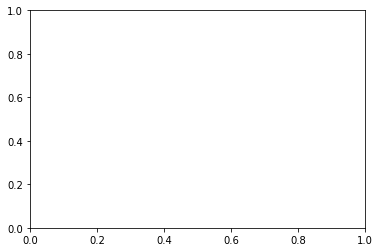

In [60]:
plt.plot(ks,x)
plt.xlabel('Number of Recommendations Shown')
plt.ylabel('Number of Matched Recommendations')

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.02
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method min: 0.0033333333333333335
MSE on 1.0 correct recs: 1.188484771173534
1/10 recs exist in at least one user list
Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.02
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.02
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method mean: 0.006666666666666667
MSE on 2.0 correct recs: 16.805878169591686
2/10 recs exist in at least one user list
Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.02
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision f

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.02
Precision for user Tanmay: 0.02
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type combine_recommender, and agg_method max: 0.006666666666666667
MSE on 2.0 correct recs: 2.0113393667051365
2/10 recs exist in at least one user list
Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.02
Precision for user Tanmay: 0.02
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method min: 0.006666666666666667
MSE on 2.0 correct recs: 2.360709265601414
2/10 recs exist in at least one user list
Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.02
Precision for user Tanmay: 0.02
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Pre

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.02
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type combine_recommender, and agg_method mean: 0.0033333333333333335
MSE on 1.0 correct recs: 2.1515651199786183
1/10 recs exist in at least one user list
Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type combine_recommender, and agg_method max: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type vir

Precision for user Tanmay: 0.02
Precision for user Tanmay's friend: 0.04
Precision for user Chase: 0.02
4
Precision for user Kien: 0.02
Precision for user Ajay Friend: 0.02
Precision for user Lily‘s friend: 0.02
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method min: 0.01
MSE on 3.0 correct recs: 18.426735704932465
3/10 recs exist in at least one user list
Precision for user Kien: 0.02
Precision for user Ajay Friend: 0.02
Precision for user Lily‘s friend: 0.02
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method mean: 0.01
MSE on 3.0 correct recs: 18.426735704932465
3/10 recs exist in at least one user list
Precision for user Kien: 0.02
Precision for user Ajay Friend: 0.02
Precision for user Lily‘s friend: 0.02
Precision for user Tanmay: 0.0
Precision 

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.02
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type combine_recommender, and agg_method mean: 0.0033333333333333335
MSE on 1.0 correct recs: 1.293676946528866
1/10 recs exist in at least one user list
Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.04
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type combine_recommender, and agg_method max: 0.006666666666666667
MSE on 2.0 correct recs: 0.7494930203101282
2/10 recs exist in at least one user list
Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.02
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overal

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type combine_recommender, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.02
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.02
Precision for user Chase: 0.02
Overall Precision for reg 0.1, rec_type combine_recommender, and agg_method mean: 0.01
MSE on 3.0 correct recs: 0.6132290668243556
3/10 recs exist in at least one user list
Precision for user Kien: 0.02
Precision for user Ajay Friend: 0.02
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.02
Precision for user Chase: 0.02
Overall Precision for reg 0.1, rec_type combine_reco

Precision for user Kien: 0.022222222222222223
Precision for user Ajay Friend: 0.022222222222222223
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.022222222222222223
Precision for user Chase: 0.022222222222222223
Precision for user Kien: 0.02
Precision for user Ajay Friend: 0.02
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.02
Precision for user Chase: 0.02
4
Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
Precision for user Kien: 0.02
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's f

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.02
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type combine_recommender, and agg_method min: 0.0033333333333333335
MSE on 1.0 correct recs: 4.932155383010908
1/10 recs exist in at least one user list
Precision for user Kien: 0.04
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.02
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type combine_recommender, and agg_method mean: 0.01
MSE on 3.0 correct recs: 2.6039117305513186
3/10 recs exist in at least one user list
Precision for user Kien: 0.04
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.02
Precision for user Chase: 0.0
Overall Precision fo

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type combine_recommender, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type combine_recommender, and agg_method mean: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type combine_recommender, and agg_method

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.02
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
10
Precision for user Kien: 0.02
Precision for user Ajay Friend: 0.02
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method min: 0.006666666666666667
MSE on 2.0 correct recs: 24.259649289089026
2/10 recs exist in at least one user list
Precision for user Kien: 0.02
Precision for user Ajay Friend: 0.02
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method mean: 0.006666666666666667
MSE on 2.0 correct recs: 24.259649289089026
2/10 recs exist in at least one user list
Precision for u

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.02
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type combine_recommender, and agg_method min: 0.0033333333333333335
MSE on 1.0 correct recs: 2.738508582787975
1/10 recs exist in at least one user list
Precision for user Kien: 0.04
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.02
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 10.0, rec_type combine_recommender, and agg_method mean: 0.01
MSE on 3.0 correct recs: 1.8098531815025758
3/10 recs exist in at least one user list
Precision for user Kien: 0.04
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.02
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision fo

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.1, rec_type virtual_user, and agg_method mean: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.02
Precision for user Lily‘s friend: 0.02
Precision for user Tanmay: 0.02
Precision for user Tanmay's friend: 0.02
Precision for user Chase: 0.02
Overall Precision for reg 0.1, rec_type virtual_user, and agg_method max: 0.016666666666666666
MSE on 5.0 correct recs: 1.057338363862293
5/10 recs exist in at least one user list
Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.02
Precision for user Lily‘s friend: 0.02
Precision for user Tanmay: 0.02
Precision for user Tanmay's friend: 0.02
Precision for user Chase: 0.02
Overall Precision for reg 0.1, rec_type combine_

Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type combine_recommender, and agg_method mean: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.02
Precision for user Lily‘s friend: 0.02
Precision for user Tanmay: 0.02
Precision for user Tanmay's friend: 0.02
Precision for user Chase: 0.02
Overall Precision for reg 100.0, rec_type combine_recommender, and agg_method max: 0.016666666666666666
MSE on 5.0 correct recs: 0.9478082890345572
5/10 recs exist in at least one user list
Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 1, rec_type combine_recommender, and agg_method min: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
Precision for user Kien: 0.02
Precision for user Ajay Friend: 0.02
Precision for user Lily‘s friend: 0.02
Precision for user Tanmay: 0.02
Precision for user Tanmay's friend: 0.02
Precision for user Chase: 0.02
Overall Precision for reg 1, rec_type combine_recommender, and agg_method mean: 0.02
MSE on 6.0 correct recs: 0.7825204503224831
6/10 recs exist in at least one user list
Precision for user Kien: 0.02
Precision for user Ajay Friend: 0.02
Precision for user Lily‘s friend: 0.02
Precision for user Tanmay: 0.02
Precision for user Tanmay's friend: 0.02
Precision for user Chase: 0.02
Overall Precision for reg 1, rec_type combine_recom

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method mean: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.0
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type virtual_user, and agg_method max: 0.0
MSE on 0.0 correct recs: 0.0
0/10 recs exist in at least one user list
Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.02
Precision for user Chase: 0.0
Overall Precision for reg 0.01, rec_type combine_recommender, and agg_method min: 0.00

Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.02
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method min: 0.0033333333333333335
MSE on 1.0 correct recs: 9.131908637814472
1/10 recs exist in at least one user list
Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.02
Precision for user Chase: 0.0
Overall Precision for reg 100.0, rec_type virtual_user, and agg_method mean: 0.0033333333333333335
MSE on 1.0 correct recs: 9.131908637814472
1/10 recs exist in at least one user list
Precision for user Kien: 0.0
Precision for user Ajay Friend: 0.0
Precision for user Lily‘s friend: 0.0
Precision for user Tanmay: 0.0
Precision for user Tanmay's friend: 0.02
Precision for user Chase: 0.0
Overall Precision 

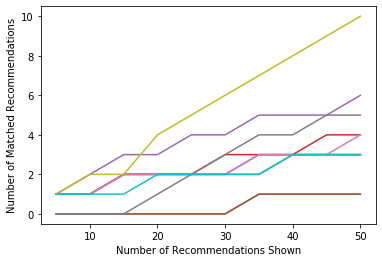

In [109]:
x=0
for i in range(10):
    x+=evaluate(group_rating_df, k=50)
print(x/10)